In [1]:
import polars as pl
import numpy as np
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, balanced_accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

In [2]:
df_polars = pl.read_parquet('dataset.parquet')

In [3]:
df_polars = df_polars.sample(fraction=0.01, seed=42)

In [4]:
df_polars

ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
f64,str,str,i32,str,i32,i64,i64,f64,f64,f64,i64,str,str,i32,i64,i64,i64,i64,i64,str,i32,str
1.5322e9,"""C63mNb4FhdpSoHAj9g""","""192.168.100.108""",5526,"""47.138.157.173""",37215,0,0,0.0,0.0,0.0,0,"""-""","""-""",0,0,1,40,0,0,"""(empty)""",1,"""Okiru"""
1.5326e9,"""CppkaidEFlUgsYbOh""","""192.168.100.111""",60403,"""147.32.6.210""",23,1,0,0.0,0.0,0.0,2,"""-""","""-""",0,7,1,40,0,0,"""(empty)""",1,"""PartOfAHorizontalPortScan"""
1.5326e9,"""CNXYoV2KOSjeK0XsCi""","""192.168.100.111""",13386,"""50.229.102.190""",81,1,0,0.0,0.0,0.0,2,"""-""","""-""",0,7,1,40,0,0,"""(empty)""",1,"""PartOfAHorizontalPortScan"""
1.5455e9,"""Cv91cy38cVUjBeny4k""","""192.168.1.198""",36097,"""78.87.208.14""",37215,0,0,null,null,null,0,"""-""","""-""",0,0,1,40,0,0,"""-""",1,"""Okiru"""
1.5454e9,"""CKvVZA3voOeDO627Ca""","""192.168.1.198""",36097,"""202.99.70.13""",37215,0,0,null,null,null,0,"""-""","""-""",0,0,1,40,0,0,"""-""",1,"""Okiru"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1.5514e9,"""CwwQzn3658DIsMZ9uj""","""192.168.1.193""",30535,"""217.130.2.16""",8081,0,1,0.000005,0.0,0.0,1,"""-""","""-""",0,1,2,80,0,0,"""-""",1,"""PartOfAHorizontalPortScan"""
1.5454e9,"""CnykMt2RDdLvT42t8l""","""192.168.1.198""",36097,"""112.160.204.32""",37215,0,0,null,null,null,0,"""-""","""-""",0,0,1,40,0,0,"""-""",1,"""Okiru"""
1.5514e9,"""CDjM7C2ZIehXyoB3f""","""192.168.1.200""",41258,"""134.130.151.164""",23,0,1,0.000002,0.0,0.0,1,"""-""","""-""",0,1,2,120,0,0,"""-""",1,"""PartOfAHorizontalPortScan"""


In [5]:
df_pandas = df_polars.to_pandas()

In [6]:
df_pandas[['duration', 'orig_bytes', 'resp_bytes']] = df_pandas[['duration', 'orig_bytes', 'resp_bytes']].fillna(0)

In [7]:
#df_polars = df_polars.drop(["ts", "uid", "id.orig_h", "id.resp_h", "local_orig", "local_resp", "missed_bytes" , "tunnel_parents", "detailed-label"])

In [8]:
import ipaddress

def ip_to_int(ip: str) -> int:
    try:
        return int(ipaddress.ip_address(ip))  # Funciona tanto para IPv4 quanto IPv6
    except ValueError:
        return None


In [9]:
df_pandas

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.532151e+09,C63mNb4FhdpSoHAj9g,192.168.100.108,5526,47.138.157.173,37215,0,0,0.000000,0.0,...,-,0,0,1,40,0,0,(empty),1,Okiru
1,1.532570e+09,CppkaidEFlUgsYbOh,192.168.100.111,60403,147.32.6.210,23,1,0,0.000000,0.0,...,-,0,7,1,40,0,0,(empty),1,PartOfAHorizontalPortScan
2,1.532565e+09,CNXYoV2KOSjeK0XsCi,192.168.100.111,13386,50.229.102.190,81,1,0,0.000000,0.0,...,-,0,7,1,40,0,0,(empty),1,PartOfAHorizontalPortScan
3,1.545465e+09,Cv91cy38cVUjBeny4k,192.168.1.198,36097,78.87.208.14,37215,0,0,0.000000,0.0,...,-,0,0,1,40,0,0,-,1,Okiru
4,1.545399e+09,CKvVZA3voOeDO627Ca,192.168.1.198,36097,202.99.70.13,37215,0,0,0.000000,0.0,...,-,0,0,1,40,0,0,-,1,Okiru
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555228,1.551404e+09,CwwQzn3658DIsMZ9uj,192.168.1.193,30535,217.130.2.16,8081,0,1,0.000005,0.0,...,-,0,1,2,80,0,0,-,1,PartOfAHorizontalPortScan
555229,1.545414e+09,CnykMt2RDdLvT42t8l,192.168.1.198,36097,112.160.204.32,37215,0,0,0.000000,0.0,...,-,0,0,1,40,0,0,-,1,Okiru
555230,1.551403e+09,CDjM7C2ZIehXyoB3f,192.168.1.200,41258,134.130.151.164,23,0,1,0.000002,0.0,...,-,0,1,2,120,0,0,-,1,PartOfAHorizontalPortScan
555231,1.551406e+09,CttXNg3OrZSHSsUTH5,192.168.1.200,36658,171.251.198.162,23,0,1,0.000214,0.0,...,-,0,1,2,120,0,0,-,1,PartOfAHorizontalPortScan


In [10]:
df_pandas = df_pandas.dropna()

In [11]:
df_pandas['id.orig_h'] = df_pandas['id.orig_h'].apply(ip_to_int)
df_pandas['id.resp_h'] = df_pandas['id.resp_h'].apply(ip_to_int)

In [12]:
df_pandas

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.532151e+09,C63mNb4FhdpSoHAj9g,3232261228,5526,797613485,37215,0,0,0.000000,0.0,...,-,0,0,1,40,0,0,(empty),1,Okiru
1,1.532570e+09,CppkaidEFlUgsYbOh,3232261231,60403,2468349650,23,1,0,0.000000,0.0,...,-,0,7,1,40,0,0,(empty),1,PartOfAHorizontalPortScan
2,1.532565e+09,CNXYoV2KOSjeK0XsCi,3232261231,13386,853894846,81,1,0,0.000000,0.0,...,-,0,7,1,40,0,0,(empty),1,PartOfAHorizontalPortScan
3,1.545465e+09,Cv91cy38cVUjBeny4k,3232235974,36097,1314377742,37215,0,0,0.000000,0.0,...,-,0,0,1,40,0,0,-,1,Okiru
4,1.545399e+09,CKvVZA3voOeDO627Ca,3232235974,36097,3395503629,37215,0,0,0.000000,0.0,...,-,0,0,1,40,0,0,-,1,Okiru
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555228,1.551404e+09,CwwQzn3658DIsMZ9uj,3232235969,30535,3649176080,8081,0,1,0.000005,0.0,...,-,0,1,2,80,0,0,-,1,PartOfAHorizontalPortScan
555229,1.545414e+09,CnykMt2RDdLvT42t8l,3232235974,36097,1889586208,37215,0,0,0.000000,0.0,...,-,0,0,1,40,0,0,-,1,Okiru
555230,1.551403e+09,CDjM7C2ZIehXyoB3f,3232235976,41258,2256705444,23,0,1,0.000002,0.0,...,-,0,1,2,120,0,0,-,1,PartOfAHorizontalPortScan
555231,1.551406e+09,CttXNg3OrZSHSsUTH5,3232235976,36658,2885404322,23,0,1,0.000214,0.0,...,-,0,1,2,120,0,0,-,1,PartOfAHorizontalPortScan


In [13]:
colunas_a_remover = ['uid', 'tunnel_parents']
df_pandas = df_pandas.drop(columns=colunas_a_remover, errors='ignore')

In [14]:
from sklearn.preprocessing import LabelEncoder

colunas_categoricas = ['service', 'conn_state', 'local_orig', 'local_resp', 'detailed-label']
encoder = LabelEncoder()

for col in colunas_categoricas:
    df_pandas[col] = encoder.fit_transform(df_pandas[col])
df_pandas_numeric = df_pandas.select_dtypes(include=[float, int])


In [15]:
#df_polars = df_polars.drop('label')

In [16]:
spearman_corr = df_pandas_numeric.corr(method='spearman')

correlacoes_alvo = spearman_corr['label'].sort_values(ascending=False)
print(correlacoes_alvo)

label             1.000000
detailed-label    0.677094
id.resp_p         0.524905
history           0.350750
conn_state        0.321464
service           0.250785
proto             0.216594
orig_bytes       -0.019402
resp_pkts        -0.031606
resp_ip_bytes    -0.031618
resp_bytes       -0.034304
ts               -0.057482
orig_pkts        -0.216362
duration         -0.244363
id.orig_p        -0.433162
orig_ip_bytes    -0.464085
local_orig             NaN
local_resp             NaN
missed_bytes           NaN
Name: label, dtype: float64


In [17]:
local_orig_unique = df_pandas_numeric['local_orig'].unique()
local_resp_unique = df_pandas_numeric['local_resp'].unique()
missed_bytes_unique = df_pandas_numeric['missed_bytes'].unique()

print("Valores únicos de 'local_orig':")
print(local_orig_unique)
print("\nValores únicos de 'local_resp':")
print(local_resp_unique)
print("\nValores únicos de 'missed_bytes':")
print(missed_bytes_unique)

Valores únicos de 'local_orig':
[0]

Valores únicos de 'local_resp':
[0]

Valores únicos de 'missed_bytes':
[0]


In [18]:
limiar = 0.30
caracteristicas_relevantes = correlacoes_alvo[correlacoes_alvo.abs() > limiar].index.tolist()

if 'label' in caracteristicas_relevantes:
    caracteristicas_relevantes.remove('label')

print("Características selecionadas:", caracteristicas_relevantes)


Características selecionadas: ['detailed-label', 'id.resp_p', 'history', 'conn_state', 'id.orig_p', 'orig_ip_bytes']


In [19]:
caracteristicas_relevantes.append('label')

In [20]:
df_pandas_numeric = df_pandas[caracteristicas_relevantes]
df_pandas_numeric = df_pandas_numeric.select_dtypes(include=[float, int])


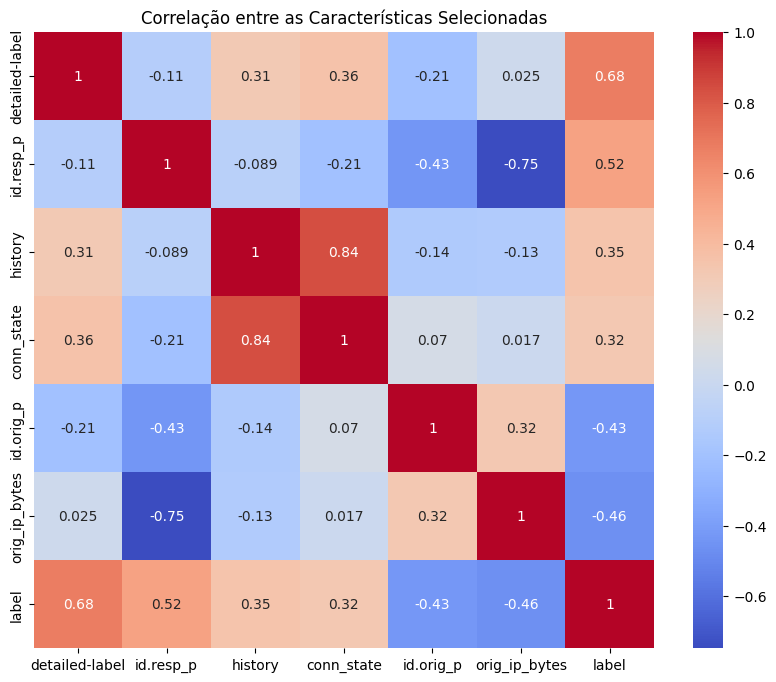

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_pandas_numeric[caracteristicas_relevantes].corr(method='spearman'), annot=True, cmap='coolwarm')
plt.title('Correlação entre as Características Selecionadas')
plt.show()

In [22]:
df_pandas_numeric

,detailed-label,id.resp_p,history,conn_state,id.orig_p,orig_ip_bytes,label
0,8,37215,0,0,5526,40,1
1,9,23,7,2,60403,40,1
2,9,81,7,2,13386,40,1
3,8,37215,0,0,36097,40,1
4,8,37215,0,0,36097,40,1
...,...,...,...,...,...,...,...
555228,9,8081,1,1,30535,80,1
555229,8,37215,0,0,36097,40,1
555230,9,23,1,1,41258,120,1
555231,9,23,1,1,36658,120,1


In [23]:
df_pandas_numeric = df_pandas_numeric.drop('label', axis=1)
df_pandas_numeric = df_pandas_numeric.drop('detailed-label', axis=1)

In [24]:
caracteristicas_relevantes.remove('label')
caracteristicas_relevantes.remove('detailed-label')

In [25]:
# Criar um DataFrame apenas com as features numéricas selecionadas
X = df_pandas_numeric[caracteristicas_relevantes]

# Calcular VIF para cada variável
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Exibir os valores de VIF
print(vif_data)


         Feature       VIF
0      id.resp_p  1.368347
1        history  7.799342
2     conn_state  8.399668
3      id.orig_p  1.578872
4  orig_ip_bytes  1.000037


In [26]:

# Remover features com VIF > 10
limiar_vif = 10
caracteristicas_sem_multicolinearidade = vif_data[vif_data["VIF"] < limiar_vif]["Feature"].tolist()
X
print("Características finais após remover multicolinearidade:", caracteristicas_sem_multicolinearidade)

Características finais após remover multicolinearidade: ['id.resp_p', 'history', 'conn_state', 'id.orig_p', 'orig_ip_bytes']
